Problem statement and Domain Knowledge:
XYZ Health Services is a top ranked Health care provider in USA with stellar credentials and provides high quality-care with focus on end-to-end Health care services. The Heath Care Services range from basic medical diagnostics to critical emergency services. The provider follows a ticketing system for all the telephonic calls received across all the departments. Calls to the provider can be for New Appointment, Cancellation, Lab Queries, Medical Refills, Insurance Related, General Doctor Advise etc. The Tickets have the details of Summary of the call and description of the calls written by various staff members with no standard text guidelines.
The challenge is, based on the Text in the Summary and Description of the call, the ticket is to be classified to Appropriate Category (out of 5 Categories) and Subcatego

plan

this is a text analysis problem,
Understand the dataset,
what each variable is describing,
make some hypothesis,
validate the hypothesis,
visualization,
prerocessing the data,


model: classification
apply logistic regression,naive bayes

In [ ]:
# load packages and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data_set = pd.read_csv('C:\\Users\\amogh\\Downloads\\TextClassification_Data.csv',encoding='cp1252')

In [4]:
len(data_set['fileid'].unique())

57280

In [5]:
data_set.shape

(57280, 7)

In [6]:
len(data_set['ID'].unique())

57280

In [7]:
data_set['categories'].value_counts()

PRESCRIPTION     15096
APPOINTMENTS     13872
MISCELLANEOUS    12167
ASK_A_DOCTOR     11799
LAB               4321
JUNK                21
mISCELLANEOUS        3
asK_A_DOCTOR         1
Name: categories, dtype: int64

In [8]:
data_set['categories'].replace('JUNK','MISCELLANEOUS',inplace =True)

In [9]:
data_set['categories'].replace('mISCELLANEOUS','MISCELLANEOUS',inplace =True)

In [10]:
data_set['categories'].replace('asK_A_DOCTOR','ASK_A_DOCTOR',inplace =True)

In [11]:
data_set['categories'].value_counts()

PRESCRIPTION     15096
APPOINTMENTS     13872
MISCELLANEOUS    12191
ASK_A_DOCTOR     11800
LAB               4321
Name: categories, dtype: int64

In [12]:
len(data_set['sub_categories'].value_counts())

22

In [13]:
data_set['sub_categories'].value_counts()

MEDICATION RELATED                               10598
NEW APPOINTMENT                                  10478
REFILL                                            9819
OTHERS                                            7356
SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)     3550
LAB RESULTS                                       2650
PROVIDER                                          1972
QUERIES FROM PHARMACY                             1722
RESCHEDULING                                      1626
SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)        1425
PRIOR AUTHORIZATION                               1226
SYMPTOMS                                          1201
CHANGE OF PROVIDER                                 953
RUNNING LATE TO APPOINTMENT                        694
CANCELLATION                                       663
QUERY ON CURRENT APPOINTMENT                       657
FOLLOW UP ON PREVIOUS REQUEST                      357
CHANGE OF HOSPITAL                                 149
QUERIES FR

In [14]:
data_set['sub_categories'].replace('mEDICATION RELATED','MEDICATION RELATED',inplace=True)

In [15]:
data_set['sub_categories'].replace('JUNK','OTHERS',inplace=True)

In [16]:
data_set.isnull().sum()

fileid                     0
SUMMARY                 3347
DATA                       0
categories                 0
sub_categories             0
previous_appointment       2
ID                         0
dtype: int64

In [17]:
data_set.ix[data_set['categories'] == 'APPOINTMENTS', 'SUMMARY'] = data_set.ix[data_set['categories'] == 'APPOINTMENTS', 
 'SUMMARY'].fillna('apptintment')

C:\Users\amogh\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [18]:
data_set.ix[data_set['categories'] == 'PRESCRIPTION', 'SUMMARY'] = data_set.ix[data_set['categories'] == 'PRESCRIPTION', 
 'SUMMARY'].fillna('prescription')

In [19]:
data_set['SUMMARY'].fillna('notes',inplace = True)

In [ ]:
#data_APPOINTMENTS.to_csv('data_APPOINTMENTS.csv')

In [ ]:
#ata_set.loc[data_set['SUMMARY'].fillna('pt'),[data_set['categories'] == 'APPOINTMENT']]

In [56]:
# visualization

In [77]:
y = data_set['sub_categories'].index

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

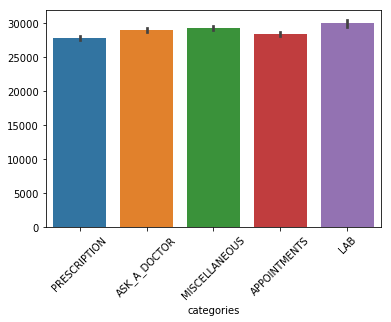

In [76]:

sns.barplot(data_set['categories'],y)

plt.xticks(rotation ='45')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

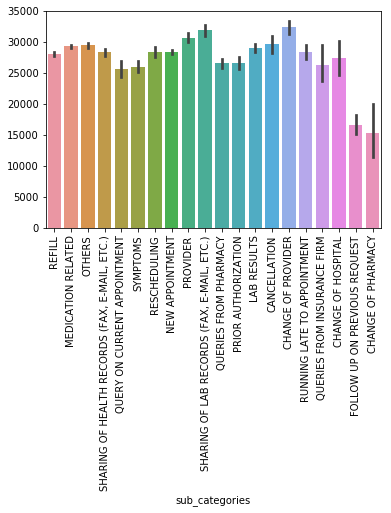

In [80]:
sns.barplot(data_set['sub_categories'],y)
plt.xticks(rotation = '90')

In [20]:
import re


In [ ]:
#e = data_set.iloc[20000:]

In [ ]:
#re.findall(r'\b[^\\par\\plain\\fs20\\par\\cf3\\par\\plain\\fs20\\par ][a-z \b0]\w+',c)

In [ ]:
#len(data_set['DATA'][0].split(" "))

In [21]:
k = []

In [22]:
for x in data_set['SUMMARY']:

    i = x.lower()
    i = i.replace('r/s','reschedule')
    i = i.replace('rx','prescription')
    i = i.replace('xr','extended release')
    #i = i.replace( 're-fill','refill')
    #i = i.replace('rescheduleduling','reschedule')
    k.append(i)
    
    
   

In [23]:
data_set['SUMMARY'] = k

In [24]:
k = []

In [25]:
for x in data_set['DATA']:

    i = x.lower()
    i = i.replace('r/s','reschedule')
    i = i.replace('rx','prescription')
    i = i.replace('xr','extended release')
    #i = i.replace( 're-fill','refill')
    #i = i.replace('rescheduleduling','reschedule')
    k.append(i)

In [26]:
data_set['DATA'] = k

In [ ]:
sched re-schedule scheduleduled rescheduledule 'scheduledule'scheduledulers' ' 'rescheduleduling'

In [82]:
k = []
for i in data_set['DATA']:
    i = i.lower()
    o = (re.findall(r'[^x $x ^\\ ^{ ^} ^; ^@]+' ,i))
    #h = re.findall(r'[^x $x]+', 
    k.append(' '.join(o))

In [83]:
data_set['sump'] = k

In [ ]:
k[0]

##### 

In [ ]:
e.head()

In [ ]:
#a = re.findall(r'may \d{1,2}[,] \d{4} \d{1,2}:\d{1,2}',texts[2])

In [ ]:
a[1].split()il

In [ ]:
re.findall(r'\d{1,2}:\d{1,2} ?[ap]m',texts[0])

In [ ]:
may 27, 2015 8:54 am

In [42]:
y = [] 
for x in texts:
    y.append(re.findall(r' (?:may|june|july|august|september|october|november|december|january|february|march|april) \d{1,2}, \d{1,4} \d{1,2}:\d{1,2} ?[ap]m',x
                    ))

In [43]:

c = []

for i in y:
    z = []
    for x in i:
        z.append(x.split(',')[1])
    c.append(z)
        

In [44]:
z =[]
for i in c:
    s =[]
    for x in i:
        s.append(x.split(" ")[2])
    z.append(s)

In [45]:
data_set['z'] = z

In [ ]:
data_set

In [ ]:
data_set['p'] = data_set['z'].apply(lambda x : len(x))

In [ ]:
for i in texts:
    j = re.findall(r'may \d{1,2}[,] \d{4} \d{1,2}:\d{1,2}',i)
    c.append(j)

In [ ]:
data_set['z'] = c

In [ ]:
data_set.to_csv('y.csv')

In [30]:
unwanted = ['rtf','ansi','ftnbj','fonttb', 'f','fswiss','arial','colortb',
            'red','green','blue','stylesheet','fs',
            'cf3', 'cb', 'cs','additive','default', 'paragraph','font', 'margl','margr','margt','margb',
            'headery','footery','formshade','sectd','marglsxn','margrsxn', 'margtsxn',
            'margbsxn','headery', 'footery', 'sbkpage', 'pgncont', 'plain','fs','pard',  'cf', 'fs',
           'sscharaux', 'b','cell', 'phonexxxx', 'xxxx', 'par','fs',  'name','bxxxx','bfs', 'other',
       'xxxx','cf','sscharaux','xxx','xxxxlli','fax','xxxxauthorizedxxxx','par','xxxxwest','cf','cf','am','pm',
              'ton','sscharaux','sscharaux','sscharaux','xxxxxxx','caller','06_smtpfaxq','marglsxn','rtf','ansi','ftnbj','fonttbl', 'f' ,'fswiss', 'arial', 'colortbl', 'stylesheet', 'fs', 'cf','cb', 'normal', 'cs', 'additive', 'cf', 'cb', 'default' 'paragraph', 'font', 'margl', 'margr','margt', 'margb','headery','footery', 'formshade',
            'sectd', 'margls', 'n' ,'margrs', 'margbs' ,'sbkpage', 'pgncont', 'plain' ,'pard', 'sscharau' ,  'for', 'b','margts','sscharau',
            'e','may','pt','ing','g','r','called','emg',
'de','michelle','s','clld','and','mom','the','she','mike','pt','patients','TRUE','v','h'
'clarks','samantha','would','like','get','her','he','mom','zzo',
'fs','n','cf','a','and','at','pm','pa','time','y','hmmmmmm','phone','called','nurse','ring','patient','back',
'harrry','velosa', 'jefferson','req','scheduledule','bella','japan','jas','jelly','jessie','jody','joel','jsut','juanita','bupap','scheduledulers','wednesday','wk','raleigh'
'per','rescheduleduling', 'yearrequest','say','son', 'tomorrow' 'boice',  'calling' 'willis','walmart', 'home','ed', 'adderall','monday','thusday','friday','saturday','sunday','trusday','pamela','denny',
'david','scooter','pavan','soccer','floor','call','called','cll',
'follow','please','tab','week','print','say','pls','seen','go''said','hour','pamela','daughter','informed','denny','m','cook'
,'thank','tomorrow','comment','u','lov','love','night','school','mohamed','morning','asked','portal','maureen','gonzales','family','brittany','following',
'printed','minute','yesterday','com','h','harry','cheryl','arnold','yestaerday',
'yesteda','yesterady','yesteray','yestersday','yestreday','mother','www','asap','atlanta',
'yup','yyy','yw','yuoy','susannah','etc','enough','christy','sumatriptan','thru','mr','mrs',
'zureikat','zumatto','zorn','zomg','day','weekend','weekly','qweek','lastweek','weekend','please','please','pleasse','plesae','plese','declineplease','tom','scott','meg','preschool','action','wood','mrichardson','nelson','nora','print','lmohamed','three',
'par', 'pt', 'calilng','b','fs','red','blue','green','cf','plain','n','to','call','sscharau','f','cd','by','headery','footery','tab',
'and','details','pm','the','for','at','she','fswiss','paragraph','arial','colortbl','font','am','thursday','friday','saturday','sunday','monday','tuesday','wednesday','margl','margr','margt','margb','formshade','sectd','margls','margrs','margts','margbs','pgncont','pard','sbkpage','stylesheet','of','r',
'a','rn','is','january','april','may','sat','fri','study','wyant','th','february','her','i','s','po''tabs','if','fa','be','rtf','ansi''ftnbj','fonttbl','have','t','you','they','or','e','june','march','as','we','an','q','july','august','september','october','november','december',
'o','d','lisa','c','him','h','ne','marry','david','ok','wilson','p','linda','jennifer','hrs','richardson','marcia',
'ha','nicole','joyce','taylor','l','holly','rowley','okay','stacy','chery',
'mead','norris','ashley','erica','iv','ivo','lori','hollie','j','tisha','carroll','boyce','rachel',
'||','ing','clayton','vimpat','sheena','porter','lloyd','rebecca','mli','hello','krissy','ndi','k','ekland',
'lousi','chalet','patt','donna','jo','susan','sarah','john','matthias','kevin','sheena','porter','lloyd',
'rebecca','murdock','tammy','rikkena','bss','sjf','casemanger,johannes','mittie','u','wife','grandfather','husband','lindae','jewilson','smita','star','gabel','glean','kaytlin','annelle','bennett','porsch','lorena','ii','please','tankoos','harums','rn','po','l','r','june','q','iii','un','opffice','uncle','aunt','thomasina',
'thompson','sussannah','sus','susa','susanah','susanna','susannan','jon','jonathan','joneth','josef','istant','ita','itchy','ivc','ivdhe',
'ivi','iwth','jack','jail','jamaica','janel','janelle','janet','janice','janie','jari','tza','kadian','kahn','kapur','karaan','karam',
'karem','kathresal','katie','katrice','kaufer','kay','kb','kcarnes','ke','keifer','keisha','kellee','jb','jc','jdwpt','jeannie,'
'jeevan','jeffrey','jenn','jenna','jennie','jillian','jim','jimenez','jmao','joan','joana','jodie','joe','joel','johnathon','johnsont','joseffs','medfusion','secure','electronic', 'georgia', 'teachers',
'Shanahan','Shannon','adams' 'rn', 'kimble''erica', 'mscn','josefs','joshi','joy','joyner','jt','jublia','jul','julia',
'julianna','joyce', 'schwartz' ,'virginia', 'Jethro','pa','jennifer', 'ellis','depakote','taper', 'caller', 'verbalized','amy', 'gonzales', 'pingram','wendy','upchurch','fms',
'julie','junel','note','concussrtp','jennifer','sachdeva','hmm','smiths','dr','jatfri','mom','dad','brother','sister','rhonda','mike','holly','starnes','angela','ginger','teresa','sheaffer','zinn','matthias','md','wgvant','durham','mann','jeffery','grandmother','amy','jackie','focalin','btbrown','margrat','perry',
'lbain', 'brereton','lla','jh','charlie','carlla','ighsmith','clld','rathke','st','givre','gina','mp','liz','thinh','holly','jtacyd']

In [31]:
import nltk

In [32]:
from nltk import sent_tokenize,word_tokenize

In [33]:
from nltk.corpus import stopwords

In [34]:
stop_words = set(stopwords.words('english'))

In [35]:
stop_words.update(unwanted)

In [36]:
#token = word_tokenize(word)

In [37]:
stopwords.words

<bound method WordListCorpusReader.words of <WordListCorpusReader in 'C:\\Users\\amogh\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>>

In [38]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

In [39]:
stop_word =[]
for i in stop_words:
    stop_word.append(i)

In [84]:
texts = nltk.Text(data_set['sump'])

In [49]:
texts[1]

'mom wants to know if the focalin needs some dosage adjusting'

def _lookup_words(input_text):
    x = []
    new_words = [] 
    new_text= []
    for word in input_text:
        
        x.append(word.split())            
        if x in lookup_dict:
            x = lookup_dict[word]
        new_words.append(x)
        new_text.append(" ".join(new_words))
    return new_text

In [ ]:
#_lookup_words(texts)

In [85]:
v =[]
for i in texts:
    
    c = re.findall(r'[a-z]+',i)
    v.append(' '.join(c))

In [86]:
h =[]
for word in v:
    h.append(word_tokenize(word))
    
   

In [ ]:
'''b = []
for i in h:
    b.append(nltk.FreqDist(i))'''

In [ ]:
#b = pd.DataFrame(b)

In [87]:
word =[]
for x in h:
    wr = []
    
    for i in x:
        if i in lookup_dict:
            i = lookup_dict[i]
        wr.append(i)
    word.append(wr)
        

In [45]:
from nltk.stem import porter
    
        
        

In [46]:
from nltk.stem.porter import PorterStemmer

In [47]:
stem = PorterStemmer()

In [88]:
filtered_sentence = []
for w in word:
    wr = []
    
    for i in w:
        if (i not in unwanted) and (i not in stop_word) and (i.isalpha()) :
            
            wr.append(lem.lemmatize(i))
    filtered_sentence.append(wr)
            
        
 

In [ ]:
filtered_sentence[20]

In [89]:
filtered = []

for i in filtered_sentence:
    f =[]
    for x in i:
        f.append(stem.stem(x))
    filtered.append(f)

In [ ]:
k =[]

In [ ]:
for x in data_set['filtered']:
    k.append(x.replace('zzolot','zoloft'))

In [ ]:
k == 'zololt'

In [90]:
data_set['filtered'] = filtered

In [91]:
data_set['filtered'] = data_set.filtered.apply(', '.join)

In [41]:
lookup_dict = {'sched':'scheduled','zololt':'zoloft','zzolot':'zoloft','appts':'appointment','aappt':'appointment','todaysappt':'appointment','apptontment':'appointment',
              'theappt':'appointment','apptmt':'appointment','apptmts':'appointment','appmt':'appointment','appmts':'appointment','zrytec':'zyrtec','zyrtect':'zyrtec',
              'zonisimide':'zonisamide','zonisomide':'zonisomide','zongran':'zonegran','zoneran':'zonegran','zonengran':'zonegran','zonegren':'zonegran','zonafram':'zonegran',
              'zololt':'zoloft','zolmitirptan':'zolmitriptan','zolpidiem':'zolpidem','zolidem':'zolpidem','zoinsamide':'zonisamide','zofram':'zofran',
              'zongeran':'zonegran','zonengran':'zonegran','zonegren':'zonegran','zonagram':'zonegran','zolmitirptan':'zolmitriptan',
              'zolidem':'zolpidem','zoinsamide':'zonisamide','zofram':'zofran','zocira':'zocor','mgr':'mg','mgmt':'mgmnt','uncoomfortable':'uncomfortable',
              'medi':'medicine','medicaitons':'medications','medicaton':'medications','mediction':'medication','medicaition':'medication',
              'medicaitionto':'medication','medicaion':'medication','medicatin':'medication','medicaire':'medicare','medicallly':'medically',
              'mediacation':'medication','medicatiion':'medication','medicationi':'medication','medicatons':'medication','med':'medicine',
              'medicacictions':'medication','mediication':'medication','telemedicine':'medicine','eprescribed':'prescribing','eprescibe':'prescribing',
              'eprescribing':'prescribing','presc':'prescribing','prescibing':'prescribing','prscrbed':'prescribing','prscirbed':'prescribing',
              'electronicprescription':'prescription','prescribtion':'prescription','prescirbed':'prescribed',
              'prescribption':'prescription','prescrib-tions':'prescription','prescrition':'prescription','appointm':'appointment',
              'appoitmnet':'appintment','appoitnment':'appointment','appointemtn':'appointment','appointent':'appointment','app':
              'appointment','allmedclinic':'clinic','clinicalmessaging':'clinic','cliniic':'clinic','cliniicals':'clinic','subclin':
              'clinic','signture':'signature','hangsigned':'signature','signatue':'signature','signaurture':'signature','nee':'knee',
              'neeed':'need','nees':'knee','neees':'knee','numbnees':'knee','emassage':'massage','messag':'message','messsage':'message',
              'pharm':'pharmacy','pharmcy':'pharmacy','pahrmay':'pharmacy','pharmavii':'pharmacy','pahrmaacy':'pharmacy',
              'ord':'order','recorer':'reorder','oordination':'coordination','orderes':'orders','stat':'state','andstates':'state',
              'refil':'refill','refils':'refill','refiled':'refilled','prefil':'prefill','autorfilled':'refilled','rrefills':'refills','amri':'mri','amdmri':'mri',
              'scedule':'schedule','schduling' : 'scheduleing','schedu':'schedule','schedul' : 'schedule','scheduld' : 'schedule','scheule' : 'schedule','scheuler' : 'schedule','schdeule' : 'schedule','schdeuled' : 'schedule','schdler':'schedule','schduler':'schedule',
'schdulers':'schedule','schedculed':'scheduled','schediuled' : 'scheduled','schedle' : 'schedule','schedled' :'scheduled','schedueled' :'scheduled',
'scheduer':'schedule','schedukler':'scheduler','schedulefd' :'schedule','scheduleing' :'scheduleing','schedulem' : 'schedule',
'schedulet':'schedule','schedulimg':'schedule','schedulin':'schedule','schedulinh':'scheduleing','schell':'schedule','wschedule':'schedule',
              'reschedled':'rescheduled','reschedueld':'reschedule','reschedled':'reschedule','reschedueld':'reschedule','reschedul':'reschedule',
'reschedulle': 'reschedule','rescheudle': 'reschedule','rescheudled': 'rescheduled','rescheuled': 'rescheduled','reschuling': 'rescheduleing','rescusitated': 'reschedule','appt': 'appointment',
              'hydrodone':'hydrocone','hydroco':'hydrocone','hydrocod':'hydrocone','headace':'headache','headaces':'headache','anyheadaches':'headache','heada':'headache','headahce':'headache','chronicdailyheadache':'headache','headach':'headache','headpressure':'headache','orally':'oral',
              'migranal':'migraine','mirganal':'migraine','mirgraine':'migraine','mirganal':'migraine','woozy':'dizzy','wooziness':'dizzy',
               'woozy':'dizzy','whoozy':'dizzy','whoozie':'dizzy','antidodie':'antibiotic','antibodi':'antibiotic','chiropracter':'chiropratic',
               'yline':'sertraline','aeegs':'eeg','ineegs':'eeg','yogart':'yogurt','ymetazoline':'nasal','calleprescription':'prescription'}

In [ ]:
for key in lookup_dict:
    for x in data_set['filtered']:
        for i in x:
        
            k.append(i.replace(key,lookup_dict[key]))
        
        

In [ ]:
data_set['filtered_sentence'] = filtered_sentence

In [ ]:
data_set['DATA_words'] = data_set['DATA'].apply(lambda x: len(str(x).split()))

In [ ]:
data_set['DATA_unique'] = data_set['DATA'].apply(lambda x: len(set(str(x).split())))

In [ ]:
data_set['words'] = data_set['filtered_sentence'].apply(lambda x: len(str(x).split()))

In [ ]:
data_set['unique_words'] = data_set['filtered_sentence'].apply(lambda x: len(set(str(x).split())))

In [ ]:
data_set['cha'] = data_set['filtered_sentence'].apply(lambda x:len(str(x)))

In [57]:
data_set['z_time'] = data_set['z'].apply(lambda x:len(x))

In [50]:
data_set['summary'] = filtered
        

In [51]:
data_set['summary'] = data_set.summary.apply(', '.join)

In [ ]:
#unwanted_words = ['appt','rn','po','l','r','june','q']

In [ ]:
    
#df['Joined'] = data_set.summary_filtered.apply(', '.join)

In [ ]:
data_set.isnull().sum()

In [ ]:
data_set['previous_appointment'].value_counts()
    
        
        

In [52]:
data_set['previous_appointment'].replace('NO','No',inplace = True)

In [53]:
data_set['previous_appointment'].replace('YES','Yes',inplace = True)

In [54]:
data_set['previous_appointment'].replace('yes','Yes',inplace = True)

In [55]:
data_set['previous_appointment'].fillna('No',inplace = True)

In [ ]:
f =[]

In [ ]:
for i in filtered_sentence:
    for x in i:
        f.append(x)

In [ ]:
p = nltk.FreqDist(f)

In [ ]:
p = pd.DataFrame(p,index=[1])

In [ ]:
p = p.transpose()

In [ ]:
p.to_csv('op.csv')

In [ ]:
data_set

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
l = LabelEncoder()

In [64]:
l.fit(data_set['categories'])

LabelEncoder()

In [65]:
l.fit(data_set['previous_appointment'])

LabelEncoder()

In [66]:
data_set['previous_appointment'] = l.fit_transform(data_set['previous_appointment'])

In [64]:
data_set['categories'] = l.fit_transform(data_set['categories'])

In [ ]:
l.fit(data_set['sub_categories'])

In [ ]:
data_set['sub_categories'] = l.transform(data_set['sub_categories'])

In [ ]:
def generate_ngrams(text, n):
    #words = text.split()
    output = []  
    for i in range(len(text)-n+1):
        output.append(text[i:i+n])
    return output



In [ ]:
data['dat'] = dat

In [92]:
from sklearn.cross_validation import train_test_split

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train_x,data_set['categories'],train_size =0.8)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [79]:
log = LogisticRegression()

In [ ]:
#fold = cross_val_score(estimator=log,X = x_train,y =y_train,cv = 20,n_jobs=-1)

In [ ]:
fold = cross_val_score

In [80]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
y_pred = log.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cn = confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score

In [84]:
cn.diagonal().sum()/11456

0.82768854748603349

In [ ]:
cn

In [ ]:
#roc_auc_score(y_test,y_pred)

In [ ]:
x_test.shape

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tf = TfidfVectorizer(min_df = 5,stop_words='english',sublinear_tf=True)

In [95]:
train_tf = tf.fit(data_set['filtered'])

In [96]:
train = pd.DataFrame(train_tf.transform(data_set['filtered']).todense(),columns = train_tf.get_feature_names())

In [97]:
train_tf = tf.fit(data_set['summary'])

In [98]:
train_ = pd.DataFrame(train_tf.transform(data_set['summary']).todense(),columns = train_tf.get_feature_names())

In [99]:
train_x = pd.concat([train,train_],axis=1)

In [ ]:
#train_x.drop(['word','unique_words'],axis=1,inplace =True)

In [91]:
train_x['z_word'] = data_set['z_time']

In [100]:
train_x['previous_appointment'] = data_set['previous_appointment']

In [ ]:
train_x = train_x.as_matrix()

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest

In [ ]:
chi = SelectKBest(chi2,k = 10000)

In [ ]:
from sklearn.cross_validation import cross_val_score

In [ ]:
train=[]

In [ ]:
train_x.shape

In [1]:
from sklearn.naive_bayes import MultinomialNB

In [2]:
mu = MultinomialNB()

In [ ]:
mu.fit(x_train,y_train)

In [ ]:
y_pred = mu.predict(x_test)

In [ ]:
cn = confusion_matrix(y_test,y_pred)

In [ ]:
cn

In [ ]:
cn.diagonal().sum()/11456

In [ ]:
x_test.shape

In [ ]:
y = y_pred.tolist()

In [ ]:
y = pd.DataFrame(y)

In [ ]:
y.to_csv('y.csv')

In [ ]:
y_test.to_csv('y_test.csv')

In [ ]:
x_test.matrix().to_csv('y1.csv')

In [ ]:
#%reset_selective

In [ ]:
#from gensim.models import Word2Vec

In [ ]:
#word = Word2Vec()

In [ ]:
# SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:

linear =LinearSVC()

In [ ]:
linear.fit(x_train,y_train)

In [ ]:
y_pred = linear.predict(x_test)

In [ ]:
cn = confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cn.diagonal().sum()/11456

In [ ]:
train_['categories'] = data_set['categories']